In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
# Import main libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries needed for reading image and processing it
import csv
from PIL import Image
from scipy.ndimage import rotate
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense,AveragePooling2D,Flatten
from keras.callbacks import ModelCheckpoint 

Using TensorFlow backend.


In [2]:
# Training digits images and labels files
letters_training_images_file_path  = "./dataVN/training images89_14240.zip"
letters_training_labels_file_path  = "./dataVN/training labels89_14240.zip"
# Testing digits images and labels files
letters_testing_images_file_path  = "./dataVN/testing images89_3560.zip"
letters_testing_labels_file_path  = "./dataVN/testing labels89_3560.zip"

# Loading dataset into dataframes
training_letters_images  = pd.read_csv(letters_training_images_file_path, compression='zip', header=None)
training_letters_labels  = pd.read_csv(letters_training_labels_file_path, compression='zip', header=None)
testing_letters_images  = pd.read_csv(letters_testing_images_file_path, compression='zip', header=None)
testing_letters_labels  = pd.read_csv(letters_testing_labels_file_path, compression='zip', header=None)

# print statistics about the dataset
print("There are %d training Vietname letter images of 64x64 pixels." %training_letters_images.shape[0])
print("There are %d testing Vietname letter images of 64x64 pixels." %testing_letters_images.shape[0])
training_letters_images.head()
testing_letters_images.head()

There are 14240 training Vietname letter images of 64x64 pixels.
There are 3560 testing Vietname letter images of 64x64 pixels.


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
training_letters_images = training_letters_images.values.astype('float32')/255
training_letters_labels = training_letters_labels.values.astype('int32')
testing_letters_images = testing_letters_images.values.astype('float32')/255
testing_letters_labels = testing_letters_labels.values.astype('int32')

from keras.utils import to_categorical

# one hot encoding
# number of classes = 10 (digits classes) + 89 (Vietnamese alphabet classes)
number_of_classes = 89
training_letters_labels_encoded = to_categorical(training_letters_labels, num_classes=number_of_classes)
testing_letters_labels_encoded = to_categorical(testing_letters_labels, num_classes=number_of_classes)
print(training_letters_labels_encoded)
# reshape input letter images to 64x64x1
training_letters_images = training_letters_images.reshape([-1, 64, 64, 1])
testing_letters_images = testing_letters_images.reshape([-1, 64, 64, 1])


print(training_letters_images.shape, training_letters_labels.shape, testing_letters_images.shape, testing_letters_labels.shape)
training_data_images = training_letters_images
training_data_labels = training_letters_labels_encoded
print("Total Training images are {} images of shape".format(training_data_images.shape[0]))
print(training_data_images.shape, training_data_labels.shape)


testing_data_images =testing_letters_images
testing_data_labels = testing_letters_labels_encoded
print("Total Testing images are {} images of shape".format(testing_data_images.shape[0]))
print(testing_data_images.shape, testing_data_labels.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(14240, 64, 64, 1) (14240, 1) (3560, 64, 64, 1) (3560, 1)
Total Training images are 14240 images of shape
(14240, 64, 64, 1) (14240, 89)
Total Testing images are 3560 images of shape
(3560, 64, 64, 1) (3560, 89)


In [4]:
  # create model
  model = Sequential()
  
  optimizer='adam'
  kernel_initializer='uniform'
  activation='relu'
  
  model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (64,64,1)))
  model.add(MaxPooling2D(pool_size = 2, strides = 2))
  model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (32,32,6)))
  model.add(MaxPooling2D(pool_size = 2, strides = 2))
  model.add(Flatten())
    
  #Fully connected final layer
  model.add(Dense(120, activation='relu'))
  model.add(Dense(84, activation='relu'))
  model.add(Dense(89, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               324600    
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [7]:
from keras.callbacks import ModelCheckpoint  
epochs=10
batch_size=40
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/Lenet-5_01.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/10
14240/14240 [==============================] - 47s 3ms/step - loss: 2.0358 - accuracy: 0.4529 - val_loss: 1.2483 - val_accuracy: 0.6202

Epoch 00001: val_loss improved from inf to 1.24832, saving model to ./model/Lenet-5_01.hdf5
Epoch 2/10
14240/14240 [==============================] - 46s 3ms/step - loss: 0.7557 - accuracy: 0.7572 - val_loss: 0.8470 - val_accuracy: 0.7410

Epoch 00002: val_loss improved from 1.24832 to 0.84698, saving model to ./model/Lenet-5_01.hdf5
Epoch 3/10
14240/14240 [==============================] - 47s 3ms/step - loss: 0.4499 - accuracy: 0.8498 - val_loss: 0.7456 - val_accuracy: 0.7817

Epoch 00003: val_loss improved from 0.84698 to 0.74558, saving model to ./model/Lenet-5_01.hdf5
Epoch 4/10
14240/14240 [==============================] - 48s 3ms/step - loss: 0.2894 - accuracy: 0.9046 - val_loss: 0.7966 - val_accuracy: 0.7896

Epoch 00004: val_loss did not improve from 0.74558
Epoch 5/10
14240/14240 [

In [8]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
   # Accuracy Curves
  plt.figure(figsize=[8,2.5])
  plt.plot(history.history['acc'],'r',linewidth=2.0)
  plt.plot(history.history['val_acc'],'b',linewidth=2.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=11)
  #plt.xlabel('Epochs ',fontsize=11)
  plt.ylabel('Accuracy',fontsize=11)
  plt.title('Accuracy Curves',fontsize=12)
     # Loss Curves
  plt.figure(figsize=[8,2.5])
  plt.plot(history.history['loss'],'r',linewidth=2.0)
  plt.plot(history.history['val_loss'],'b',linewidth=2.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=11)
  plt.xlabel('Epochs ',fontsize=11)
  plt.ylabel('Loss',fontsize=11)
  plt.title('Loss Curves',fontsize=12)

In [9]:
model.load_weights('./model/Lenet-5_01.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))


3560/3560 [==============================] - 3s 963us/step
Test Accuracy: 0.7817415595054626
Test Loss: 0.7455808913607276


In [10]:
plot_loss_accuracy(history)

KeyError: 'acc'

<Figure size 576x180 with 0 Axes>

In [ ]:
from keras.callbacks import ModelCheckpoint  
epochs=20
batch_size=40
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/Lenet-5_02.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/20
14240/14240 [==============================] - 40s 3ms/step - loss: 0.1519 - acc: 0.9471 - val_loss: 0.9702 - val_acc: 0.7865

Epoch 00001: val_loss improved from inf to 0.97025, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_02.hdf5
Epoch 2/20
14240/14240 [==============================] - 40s 3ms/step - loss: 0.1068 - acc: 0.9644 - val_loss: 0.8571 - val_acc: 0.8163

Epoch 00002: val_loss improved from 0.97025 to 0.85712, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_02.hdf5
Epoch 3/20
14240/14240 [==============================] - 40s 3ms/step - loss: 0.0955 - acc: 0.9673 - val_loss: 0.9451 - val_acc: 0.8140

Epoch 00003: val_loss did not improve from 0.85712
Epoch 4/20
14240/14240 [==============================] - 40s 3ms/step - loss: 0.0789 - acc: 0.9743 - val_loss: 0.8515 - val_acc: 0.8225

Epoch 00004: val_loss improved from 0.85712 to 0.85149, saving model to /content/drive/My Driv

3560/3560 [==============================] - 3s 791us/step
Test Accuracy: 0.8224719101123595
Test Loss: 0.8514873375132512


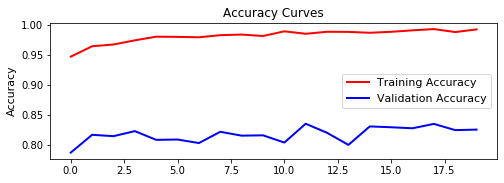

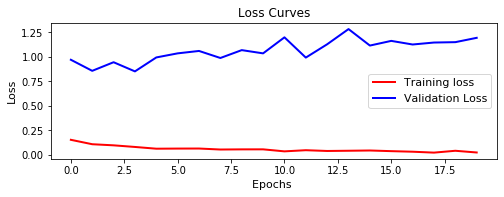

In [ ]:
model.load_weights('./model/Lenet-5_02.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)


In [ ]:
from keras.callbacks import ModelCheckpoint  
epochs=100
batch_size=40
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/Lenet-5_03.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/100
14240/14240 [==============================] - 41s 3ms/step - loss: 0.1440 - acc: 0.9560 - val_loss: 0.9259 - val_acc: 0.8197

Epoch 00001: val_loss improved from inf to 0.92588, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_03.hdf5
Epoch 2/100
14240/14240 [==============================] - 40s 3ms/step - loss: 0.0704 - acc: 0.9758 - val_loss: 0.9203 - val_acc: 0.8272

Epoch 00002: val_loss improved from 0.92588 to 0.92026, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_03.hdf5
Epoch 3/100
14240/14240 [==============================] - 40s 3ms/step - loss: 0.0548 - acc: 0.9820 - val_loss: 1.0151 - val_acc: 0.8197

Epoch 00003: val_loss did not improve from 0.92026
Epoch 4/100
14240/14240 [==============================] - 40s 3ms/step - loss: 0.0399 - acc: 0.9861 - val_loss: 1.0071 - val_acc: 0.8236

Epoch 00004: val_loss did not improve from 0.92026
Epoch 5/100
14240/14240 [==============

3560/3560 [==============================] - 3s 773us/step
Test Accuracy: 0.827247191011236
Test Loss: 0.9202565549380993


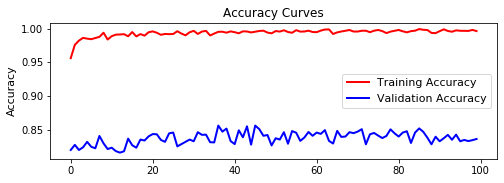

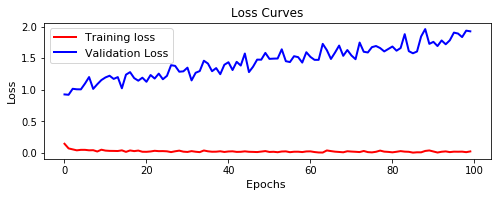

In [ ]:
model.load_weights('./model/Lenet-5_03.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [ ]:
from keras.callbacks import ModelCheckpoint  
epochs=200
batch_size=40
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='./model/Lenet-5_04.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/200
14240/14240 [==============================] - 40s 3ms/step - loss: 0.1175 - acc: 0.9638 - val_loss: 1.0792 - val_acc: 0.8084

Epoch 00001: val_loss improved from inf to 1.07915, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_04.hdf5
Epoch 2/200
14240/14240 [==============================] - 40s 3ms/step - loss: 0.0543 - acc: 0.9825 - val_loss: 1.0580 - val_acc: 0.8258

Epoch 00002: val_loss improved from 1.07915 to 1.05796, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_04.hdf5
Epoch 3/200
14240/14240 [==============================] - 41s 3ms/step - loss: 0.0385 - acc: 0.9867 - val_loss: 1.0912 - val_acc: 0.8256

Epoch 00003: val_loss did not improve from 1.05796
Epoch 4/200
14240/14240 [==============================] - 40s 3ms/step - loss: 0.0429 - acc: 0.9861 - val_loss: 1.1187 - val_acc: 0.8169

Epoch 00004: val_loss did not improve from 1.05796
Epoch 5/200
14240/14240 [==============

3560/3560 [==============================] - 3s 834us/step
Test Accuracy: 0.8258426966292135
Test Loss: 1.0579604366103585


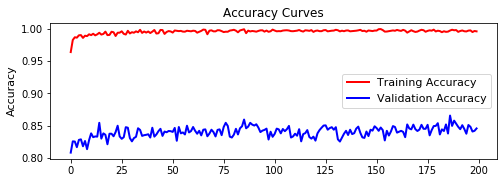

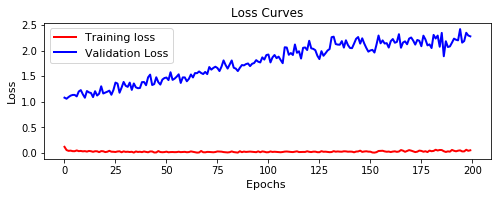

In [ ]:
model.load_weights('./model/Lenet-5_04.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [ ]:
from keras.callbacks import ModelCheckpoint  
epochs=10
batch_size=40
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Vietnamese/model/Lenet-5_05.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 14240 samples, validate on 3560 samples
Epoch 1/10





14240/14240 [==============================] - 38s 3ms/step - loss: 2.1376 - acc: 0.4302 - val_loss: 1.3304 - val_acc: 0.6003

Epoch 00001: val_loss improved from inf to 1.33039, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_05.hdf5
Epoch 2/10
14240/14240 [==============================] - 36s 3ms/step - loss: 0.8889 - acc: 0.7171 - val_loss: 1.0074 - val_acc: 0.7073

Epoch 00002: val_loss improved from 1.33039 to 1.00743, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_05.hdf5
Epoch 3/10
14240/14240 [==============================] - 36s 3ms/step - loss: 0.5562 - acc: 0.8188 - val_loss: 0.9138 - val_acc: 0.7514

Epoch 00003: val_loss improved from 1.00743 to 0.91379, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_05.hdf5
Epoch 4/10
14240/14240 [============================

3560/3560 [==============================] - 3s 858us/step
Test Accuracy: 0.7907303370786517
Test Loss: 0.8518101320842678


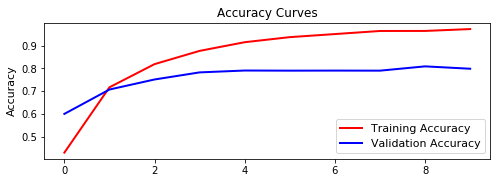

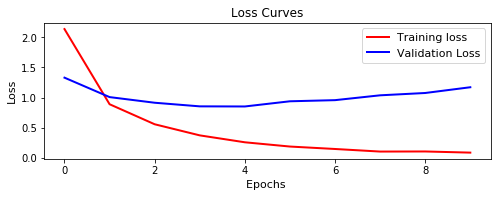

In [ ]:
model.load_weights('/content/drive/My Drive/Vietnamese/model/Lenet-5_05.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [ ]:
from keras.callbacks import ModelCheckpoint  
epochs=20
batch_size=40
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Vietnamese/model/Lenet-5_06.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/20
14240/14240 [==============================] - 36s 3ms/step - loss: 0.2260 - acc: 0.9254 - val_loss: 1.0048 - val_acc: 0.7638

Epoch 00001: val_loss improved from inf to 1.00484, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_06.hdf5
Epoch 2/20
14240/14240 [==============================] - 36s 3ms/step - loss: 0.1598 - acc: 0.9439 - val_loss: 0.9607 - val_acc: 0.7921

Epoch 00002: val_loss improved from 1.00484 to 0.96074, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_06.hdf5
Epoch 3/20
14240/14240 [==============================] - 36s 3ms/step - loss: 0.1085 - acc: 0.9628 - val_loss: 1.0903 - val_acc: 0.7947

Epoch 00003: val_loss did not improve from 0.96074
Epoch 4/20
14240/14240 [==============================] - 36s 3ms/step - loss: 0.0984 - acc: 0.9667 - val_loss: 1.1130 - val_acc: 0.7848

Epoch 00004: val_loss did not improve from 0.96074
Epoch 5/20
14240/14240 [===================

3560/3560 [==============================] - 3s 847us/step
Test Accuracy: 0.7921348314606742
Test Loss: 0.9607434074216512


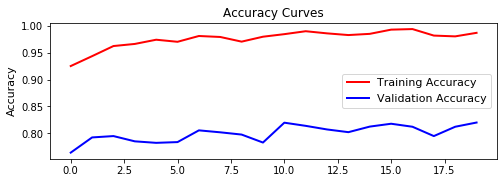

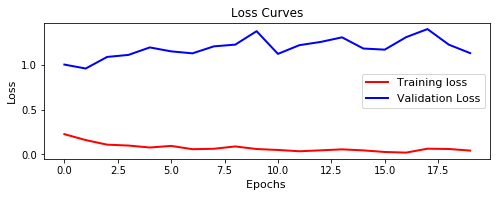

In [ ]:
model.load_weights('/content/drive/My Drive/Vietnamese/model/Lenet-5_06.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [ ]:
from keras.callbacks import ModelCheckpoint  
epochs=100
batch_size=40
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Vietnamese/model/Lenet-5_07.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Train on 14240 samples, validate on 3560 samples
Epoch 1/100
14240/14240 [==============================] - 36s 3ms/step - loss: 0.1911 - acc: 0.9351 - val_loss: 1.1850 - val_acc: 0.7669

Epoch 00001: val_loss improved from inf to 1.18499, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_07.hdf5
Epoch 2/100
14240/14240 [==============================] - 36s 3ms/step - loss: 0.1181 - acc: 0.9617 - val_loss: 1.0145 - val_acc: 0.8048

Epoch 00002: val_loss improved from 1.18499 to 1.01448, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_07.hdf5
Epoch 3/100
14240/14240 [==============================] - 36s 3ms/step - loss: 0.0753 - acc: 0.9765 - val_loss: 1.0649 - val_acc: 0.7919

Epoch 00003: val_loss did not improve from 1.01448
Epoch 4/100
14240/14240 [==============================] - 36s 3ms/step - loss: 0.0475 - acc: 0.9847 - val_loss: 1.1345 - val_acc: 0.8008

Epoch 00004: val_loss did not improve from 1.01448
Epoch 5/100
14240/14240 [==============

3560/3560 [==============================] - 3s 851us/step
Test Accuracy: 0.8047752808988764
Test Loss: 1.014481778241945


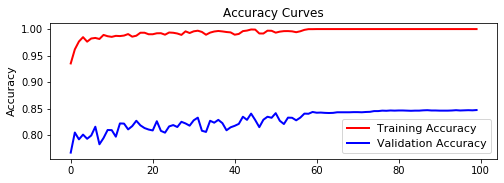

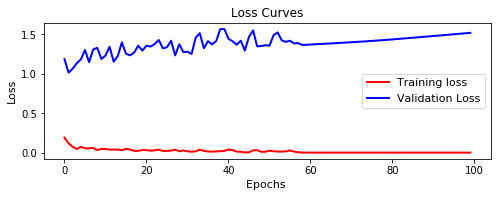

In [ ]:
model.load_weights('/content/drive/My Drive/Vietnamese/model/Lenet-5_07.hdf5')
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))
plot_loss_accuracy(history)

In [ ]:
from keras.callbacks import ModelCheckpoint  
epochs=200
batch_size=40
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Vietnamese/model/Lenet-5_08.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 14240 samples, validate on 3560 samples
Epoch 1/200





14240/14240 [==============================] - 44s 3ms/step - loss: 2.1328 - acc: 0.4382 - val_loss: 1.3446 - val_acc: 0.6017

Epoch 00001: val_loss improved from inf to 1.34460, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_08.hdf5
Epoch 2/200
14240/14240 [==============================] - 42s 3ms/step - loss: 0.8849 - acc: 0.7242 - val_loss: 1.0777 - val_acc: 0.6829

Epoch 00002: val_loss improved from 1.34460 to 1.07775, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_08.hdf5
Epoch 3/200
14240/14240 [==============================] - 42s 3ms/step - loss: 0.5764 - acc: 0.8115 - val_loss: 0.8824 - val_acc: 0.7503

Epoch 00003: val_loss improved from 1.07775 to 0.88236, saving model to /content/drive/My Drive/Vietnamese/model/Lenet-5_08.hdf5
Epoch 4/200
14240/14240 [========================

In [ ]:
model.load_weights('/content/drive/My Drive/Vietnamese/model/Lenet-5_08.hdf5')

In [ ]:

# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))


3560/3560 [==============================] - 3s 955us/step
Test Accuracy: 0.7789325842696629
Test Loss: 0.8347399055706651


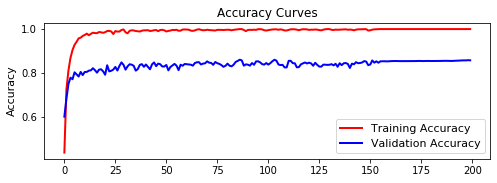

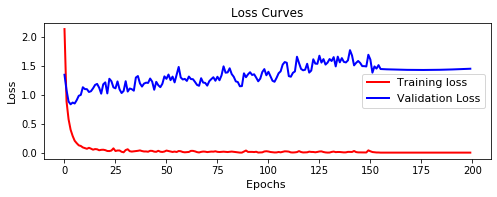

In [ ]:
plot_loss_accuracy(history)